# Getting the data

### A http request

In [19]:
%matplotlib inline

In [3]:
import requests

print(requests.get("http://www.blocket.se/stockholm?q=macbook air").text)









<!doctype html>
<html lang="sv">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta name="viewport" content="width=1012" />



<title>Stockholm  | Blocket</title>
<meta name="keywords" content=",Stockholm" />

<meta name="description" content="On Blocket you can see  ads in Stockholm" />



	
		<link rel="canonical" href="http://www.blocket.se/stockholm/">
		
	


	
		
		<link rel="next" href="http://www.blocket.se/hela_sverige?q=macbook+air&o=2" />
	



<meta name="googlebot" content="noarchive" />
<meta name="application-name" content="Blocket"/>







<meta name="google" content="nositelinkssearchbox">

 
<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon">
<link rel="apple-touch-icon" href="/apple-touch-icon.png">
<link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png">
<link rel="apple-touch-icon" sizes="72x72" href="/apple-touch-icon-72x72.png">
<link rel="apple-touch-icon" sizes="76x76" href="/apple-touc

### Our research for buying a new computer

In [37]:
import lxml.html

page = lxml.html.parse("http://www.blocket.se/stockholm?q=macbook")
# This is probably illegal. Do not use at all
items_data = []
for el in page.getroot().find_class("media item_row ptm pbm nmt"):
    links = el.find_class("item_link")
    images = el.find_class("item_image")
    prices = el.find_class("list_price")
    if links and images and prices and prices[0].text:
        items_data.append({"name": links[0].text,
                           "image": images[0].attrib['src'],
                           "price": int(prices[0].text.split(":")[0].replace(" ", ""))})
print(len(items_data))
items_data

7


[{'image': 'https://cdn.blocket.com/static/0/lithumbs/20/2050737109.jpg',
  'name': 'Macbook pro',
  'price': 9000},
 {'image': 'https://cdn.blocket.com/static/1/lithumbs/20/2062346621.jpg',
  'name': 'IMac 27"',
  'price': 11000},
 {'image': 'https://cdn.blocket.com/static/1/lithumbs/20/2014054699.jpg',
  'name': 'MacBook PRO 8gb ram 512 GB sed sent 2013',
  'price': 7200},
 {'image': 'https://cdn.blocket.com/static/1/lithumbs/20/2027826471.jpg',
  'name': 'MacBook PRO, 13# Retina Display, 2014',
  'price': 10500},
 {'image': 'https://cdn.blocket.com/static/0/lithumbs/19/1908508402.jpg',
  'name': 'MacBook 12 (guld) Intel core m',
  'price': 12000},
 {'image': 'https://cdn.blocket.com/static/2/lithumbs/00/0055866749.jpg',
  'name': 'Apple MacBook - 12" Retina - 1,2GHz 8GB 512GB',
  'price': 13000},
 {'image': 'https://cdn.blocket.com/static/0/lithumbs/19/1971380423.jpg',
  'name': 'MacBook 13 tum - i5 - 128 GB SSD - 8 GB ram',
  'price': 4500}]

In [45]:
prices = []
prices_for_retina = []
for item in items_data:
    prices.append(item['price'])
    if 'Retina' in item['name']:
        prices_for_retina.append(item['price'])
    
import matplotlib.pyplot as plt
plt.style.use('ggplot')

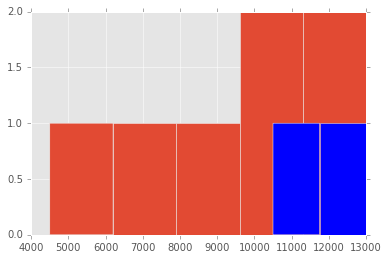

In [49]:
plt.hist(prices, 5, histtype='bar')
plt.hist(prices_for_retina, 2, histtype='bar',color='blue')
plt.show()

### Communicating with APIs

In [50]:
import requests

response = requests.get("https://www.googleapis.com/books/v1/volumes", params={"q":"machine learning"})
raw_data = response.json()
titles = [item['volumeInfo']['title'] for item in raw_data['items']]
titles

['The Computational Complexity of Machine Learning',
 'Elements of Machine Learning',
 'Machine Learning',
 'Machine Learning',
 'Principles and Theory for Data Mining and Machine Learning',
 'Machine Learning in Non-stationary Environments',
 'Machine Learning Proceedings 1991',
 'Machine Learning',
 'Machine Learning and Image Interpretation',
 'Graphical Models for Machine Learning and Digital Communication']

In [ ]:
#make a twitter api here